## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 48.5ms	remaining: 48.5s
1:	learn: 0.9301086	total: 50.5ms	remaining: 25.2s
2:	learn: 0.9005637	total: 52.5ms	remaining: 17.4s
3:	learn: 0.8720983	total: 54.5ms	remaining: 13.6s
4:	learn: 0.8467410	total: 56.4ms	remaining: 11.2s
5:	learn: 0.8226672	total: 58.4ms	remaining: 9.67s
6:	learn: 0.7994702	total: 60.2ms	remaining: 8.54s
7:	learn: 0.7784272	total: 62ms	remaining: 7.69s
8:	learn: 0.7602192	total: 64ms	remaining: 7.04s
9:	learn: 0.7412421	total: 65.9ms	remaining: 6.52s
10:	learn: 0.7247930	total: 67.7ms	remaining: 6.09s
11:	learn: 0.7089951	total: 69.8ms	remaining: 5.74s
12:	learn: 0.6951345	total: 71.9ms	remaining: 5.46s
13:	learn: 0.6809276	total: 74ms	remaining: 5.21s
14:	learn: 0.6692630	total: 75.8ms	remaining: 4.98s
15:	learn: 0.6588323	total: 77.8ms	remaining: 4.79s
16:	learn: 0.6472700	total: 79.6ms	remaining: 4.61s
17:	learn: 0.6379982	total: 81.6ms	remaining: 4.45s
18:	learn: 0.6294674	total: 83.5ms	remaining: 4.31s
19:	learn: 0.6193295	total: 

61:	learn: 0.4801376	total: 166ms	remaining: 2.52s
62:	learn: 0.4792422	total: 168ms	remaining: 2.5s
63:	learn: 0.4780719	total: 170ms	remaining: 2.49s
64:	learn: 0.4771984	total: 172ms	remaining: 2.48s
65:	learn: 0.4759610	total: 174ms	remaining: 2.46s
66:	learn: 0.4750287	total: 176ms	remaining: 2.45s
67:	learn: 0.4740093	total: 178ms	remaining: 2.44s
68:	learn: 0.4732612	total: 180ms	remaining: 2.42s
69:	learn: 0.4727266	total: 182ms	remaining: 2.41s
70:	learn: 0.4716549	total: 183ms	remaining: 2.4s
71:	learn: 0.4709088	total: 185ms	remaining: 2.39s
72:	learn: 0.4697594	total: 188ms	remaining: 2.38s
73:	learn: 0.4690934	total: 190ms	remaining: 2.37s
74:	learn: 0.4680942	total: 192ms	remaining: 2.36s
75:	learn: 0.4672726	total: 193ms	remaining: 2.35s
76:	learn: 0.4664479	total: 195ms	remaining: 2.34s
77:	learn: 0.4656044	total: 197ms	remaining: 2.33s
78:	learn: 0.4645375	total: 199ms	remaining: 2.32s
79:	learn: 0.4639654	total: 201ms	remaining: 2.31s
80:	learn: 0.4628457	total: 203ms

86:	learn: 0.4583577	total: 216ms	remaining: 2.26s
87:	learn: 0.4577999	total: 218ms	remaining: 2.25s
88:	learn: 0.4572657	total: 220ms	remaining: 2.25s
89:	learn: 0.4569360	total: 221ms	remaining: 2.24s
90:	learn: 0.4559969	total: 223ms	remaining: 2.23s
91:	learn: 0.4549716	total: 225ms	remaining: 2.22s
92:	learn: 0.4544919	total: 228ms	remaining: 2.22s
93:	learn: 0.4537693	total: 229ms	remaining: 2.21s
94:	learn: 0.4532673	total: 231ms	remaining: 2.2s
95:	learn: 0.4526987	total: 233ms	remaining: 2.2s
96:	learn: 0.4520952	total: 235ms	remaining: 2.19s
97:	learn: 0.4513919	total: 237ms	remaining: 2.18s
98:	learn: 0.4503747	total: 239ms	remaining: 2.17s
99:	learn: 0.4494783	total: 241ms	remaining: 2.16s
100:	learn: 0.4487329	total: 242ms	remaining: 2.16s
101:	learn: 0.4481325	total: 244ms	remaining: 2.15s
102:	learn: 0.4475445	total: 246ms	remaining: 2.14s
103:	learn: 0.4466014	total: 248ms	remaining: 2.14s
104:	learn: 0.4461730	total: 250ms	remaining: 2.13s
105:	learn: 0.4457259	total:

147:	learn: 0.4264987	total: 335ms	remaining: 1.93s
148:	learn: 0.4262192	total: 337ms	remaining: 1.92s
149:	learn: 0.4257966	total: 339ms	remaining: 1.92s
150:	learn: 0.4253062	total: 340ms	remaining: 1.91s
151:	learn: 0.4247446	total: 342ms	remaining: 1.91s
152:	learn: 0.4237365	total: 344ms	remaining: 1.91s
153:	learn: 0.4233079	total: 346ms	remaining: 1.9s
154:	learn: 0.4228876	total: 348ms	remaining: 1.9s
155:	learn: 0.4225404	total: 350ms	remaining: 1.9s
156:	learn: 0.4222831	total: 352ms	remaining: 1.89s
157:	learn: 0.4218088	total: 354ms	remaining: 1.89s
158:	learn: 0.4213239	total: 356ms	remaining: 1.89s
159:	learn: 0.4210022	total: 359ms	remaining: 1.88s
160:	learn: 0.4201256	total: 361ms	remaining: 1.88s
161:	learn: 0.4197073	total: 363ms	remaining: 1.88s
162:	learn: 0.4192052	total: 365ms	remaining: 1.88s
163:	learn: 0.4187949	total: 367ms	remaining: 1.87s
164:	learn: 0.4184572	total: 369ms	remaining: 1.87s
165:	learn: 0.4180680	total: 371ms	remaining: 1.86s
166:	learn: 0.4

170:	learn: 0.4161870	total: 381ms	remaining: 1.85s
171:	learn: 0.4156228	total: 384ms	remaining: 1.85s
172:	learn: 0.4153041	total: 386ms	remaining: 1.84s
173:	learn: 0.4148857	total: 387ms	remaining: 1.84s
174:	learn: 0.4144190	total: 390ms	remaining: 1.84s
175:	learn: 0.4140875	total: 392ms	remaining: 1.83s
176:	learn: 0.4136755	total: 394ms	remaining: 1.83s
177:	learn: 0.4133860	total: 396ms	remaining: 1.83s
178:	learn: 0.4129780	total: 398ms	remaining: 1.82s
179:	learn: 0.4122907	total: 401ms	remaining: 1.83s
180:	learn: 0.4119188	total: 403ms	remaining: 1.82s
181:	learn: 0.4115412	total: 405ms	remaining: 1.82s
182:	learn: 0.4112620	total: 407ms	remaining: 1.82s
183:	learn: 0.4107734	total: 410ms	remaining: 1.82s
184:	learn: 0.4104881	total: 412ms	remaining: 1.81s
185:	learn: 0.4100009	total: 414ms	remaining: 1.81s
186:	learn: 0.4096453	total: 416ms	remaining: 1.81s
187:	learn: 0.4093395	total: 418ms	remaining: 1.81s
188:	learn: 0.4090020	total: 420ms	remaining: 1.8s
189:	learn: 0

227:	learn: 0.3965787	total: 500ms	remaining: 1.69s
228:	learn: 0.3963073	total: 502ms	remaining: 1.69s
229:	learn: 0.3960925	total: 504ms	remaining: 1.69s
230:	learn: 0.3957018	total: 506ms	remaining: 1.68s
231:	learn: 0.3954162	total: 508ms	remaining: 1.68s
232:	learn: 0.3951665	total: 510ms	remaining: 1.68s
233:	learn: 0.3949269	total: 512ms	remaining: 1.68s
234:	learn: 0.3945894	total: 514ms	remaining: 1.67s
235:	learn: 0.3944181	total: 516ms	remaining: 1.67s
236:	learn: 0.3941497	total: 518ms	remaining: 1.67s
237:	learn: 0.3939819	total: 520ms	remaining: 1.67s
238:	learn: 0.3938322	total: 522ms	remaining: 1.66s
239:	learn: 0.3935463	total: 524ms	remaining: 1.66s
240:	learn: 0.3933166	total: 526ms	remaining: 1.66s
241:	learn: 0.3930992	total: 528ms	remaining: 1.65s
242:	learn: 0.3928898	total: 530ms	remaining: 1.65s
243:	learn: 0.3926199	total: 532ms	remaining: 1.65s
244:	learn: 0.3923955	total: 534ms	remaining: 1.64s
245:	learn: 0.3922312	total: 536ms	remaining: 1.64s
246:	learn: 

250:	learn: 0.3908375	total: 545ms	remaining: 1.63s
251:	learn: 0.3904815	total: 548ms	remaining: 1.63s
252:	learn: 0.3902127	total: 550ms	remaining: 1.62s
253:	learn: 0.3900274	total: 552ms	remaining: 1.62s
254:	learn: 0.3898171	total: 554ms	remaining: 1.62s
255:	learn: 0.3896180	total: 556ms	remaining: 1.61s
256:	learn: 0.3894251	total: 558ms	remaining: 1.61s
257:	learn: 0.3892139	total: 560ms	remaining: 1.61s
258:	learn: 0.3889352	total: 562ms	remaining: 1.61s
259:	learn: 0.3886531	total: 564ms	remaining: 1.61s
260:	learn: 0.3884539	total: 566ms	remaining: 1.6s
261:	learn: 0.3882459	total: 568ms	remaining: 1.6s
262:	learn: 0.3881101	total: 570ms	remaining: 1.6s
263:	learn: 0.3879324	total: 572ms	remaining: 1.59s
264:	learn: 0.3876861	total: 574ms	remaining: 1.59s
265:	learn: 0.3874255	total: 576ms	remaining: 1.59s
266:	learn: 0.3868515	total: 578ms	remaining: 1.59s
267:	learn: 0.3866114	total: 580ms	remaining: 1.58s
268:	learn: 0.3863119	total: 582ms	remaining: 1.58s
269:	learn: 0.3

309:	learn: 0.3777358	total: 666ms	remaining: 1.48s
310:	learn: 0.3775809	total: 668ms	remaining: 1.48s
311:	learn: 0.3774323	total: 669ms	remaining: 1.48s
312:	learn: 0.3772732	total: 671ms	remaining: 1.47s
313:	learn: 0.3771184	total: 673ms	remaining: 1.47s
314:	learn: 0.3769370	total: 675ms	remaining: 1.47s
315:	learn: 0.3766643	total: 677ms	remaining: 1.47s
316:	learn: 0.3764891	total: 679ms	remaining: 1.46s
317:	learn: 0.3762751	total: 681ms	remaining: 1.46s
318:	learn: 0.3761284	total: 683ms	remaining: 1.46s
319:	learn: 0.3760168	total: 685ms	remaining: 1.46s
320:	learn: 0.3757763	total: 687ms	remaining: 1.45s
321:	learn: 0.3756076	total: 689ms	remaining: 1.45s
322:	learn: 0.3754123	total: 691ms	remaining: 1.45s
323:	learn: 0.3751852	total: 693ms	remaining: 1.45s
324:	learn: 0.3750004	total: 695ms	remaining: 1.44s
325:	learn: 0.3749086	total: 697ms	remaining: 1.44s
326:	learn: 0.3746654	total: 699ms	remaining: 1.44s
327:	learn: 0.3745405	total: 700ms	remaining: 1.44s
328:	learn: 

332:	learn: 0.3733429	total: 711ms	remaining: 1.42s
333:	learn: 0.3732059	total: 713ms	remaining: 1.42s
334:	learn: 0.3730574	total: 715ms	remaining: 1.42s
335:	learn: 0.3728663	total: 717ms	remaining: 1.42s
336:	learn: 0.3727111	total: 719ms	remaining: 1.41s
337:	learn: 0.3724765	total: 720ms	remaining: 1.41s
338:	learn: 0.3722959	total: 722ms	remaining: 1.41s
339:	learn: 0.3720213	total: 724ms	remaining: 1.41s
340:	learn: 0.3718316	total: 726ms	remaining: 1.4s
341:	learn: 0.3716519	total: 728ms	remaining: 1.4s
342:	learn: 0.3714592	total: 730ms	remaining: 1.4s
343:	learn: 0.3713389	total: 732ms	remaining: 1.4s
344:	learn: 0.3711642	total: 734ms	remaining: 1.39s
345:	learn: 0.3709569	total: 735ms	remaining: 1.39s
346:	learn: 0.3708184	total: 737ms	remaining: 1.39s
347:	learn: 0.3705958	total: 739ms	remaining: 1.38s
348:	learn: 0.3703798	total: 741ms	remaining: 1.38s
349:	learn: 0.3701923	total: 743ms	remaining: 1.38s
350:	learn: 0.3700067	total: 745ms	remaining: 1.38s
351:	learn: 0.36

395:	learn: 0.3629529	total: 831ms	remaining: 1.27s
396:	learn: 0.3627743	total: 833ms	remaining: 1.26s
397:	learn: 0.3626747	total: 835ms	remaining: 1.26s
398:	learn: 0.3625881	total: 837ms	remaining: 1.26s
399:	learn: 0.3622963	total: 839ms	remaining: 1.26s
400:	learn: 0.3622314	total: 841ms	remaining: 1.26s
401:	learn: 0.3620143	total: 843ms	remaining: 1.25s
402:	learn: 0.3618403	total: 845ms	remaining: 1.25s
403:	learn: 0.3616747	total: 847ms	remaining: 1.25s
404:	learn: 0.3614255	total: 849ms	remaining: 1.25s
405:	learn: 0.3613607	total: 851ms	remaining: 1.24s
406:	learn: 0.3612875	total: 852ms	remaining: 1.24s
407:	learn: 0.3611516	total: 854ms	remaining: 1.24s
408:	learn: 0.3609621	total: 856ms	remaining: 1.24s
409:	learn: 0.3608193	total: 858ms	remaining: 1.23s
410:	learn: 0.3604920	total: 860ms	remaining: 1.23s
411:	learn: 0.3603038	total: 862ms	remaining: 1.23s
412:	learn: 0.3602055	total: 864ms	remaining: 1.23s
413:	learn: 0.3599094	total: 866ms	remaining: 1.23s
414:	learn: 

418:	learn: 0.3591088	total: 876ms	remaining: 1.21s
419:	learn: 0.3589470	total: 878ms	remaining: 1.21s
420:	learn: 0.3587972	total: 880ms	remaining: 1.21s
421:	learn: 0.3586831	total: 881ms	remaining: 1.21s
422:	learn: 0.3585620	total: 883ms	remaining: 1.2s
423:	learn: 0.3584427	total: 885ms	remaining: 1.2s
424:	learn: 0.3583044	total: 887ms	remaining: 1.2s
425:	learn: 0.3581698	total: 889ms	remaining: 1.2s
426:	learn: 0.3580461	total: 891ms	remaining: 1.2s
427:	learn: 0.3579182	total: 893ms	remaining: 1.19s
428:	learn: 0.3577521	total: 895ms	remaining: 1.19s
429:	learn: 0.3576138	total: 896ms	remaining: 1.19s
430:	learn: 0.3575528	total: 898ms	remaining: 1.19s
431:	learn: 0.3574686	total: 900ms	remaining: 1.18s
432:	learn: 0.3572923	total: 902ms	remaining: 1.18s
433:	learn: 0.3571859	total: 904ms	remaining: 1.18s
434:	learn: 0.3570185	total: 906ms	remaining: 1.18s
435:	learn: 0.3568416	total: 908ms	remaining: 1.17s
436:	learn: 0.3566846	total: 909ms	remaining: 1.17s
437:	learn: 0.356

481:	learn: 0.3503906	total: 994ms	remaining: 1.07s
482:	learn: 0.3501522	total: 997ms	remaining: 1.07s
483:	learn: 0.3500494	total: 999ms	remaining: 1.06s
484:	learn: 0.3498921	total: 1s	remaining: 1.06s
485:	learn: 0.3497143	total: 1s	remaining: 1.06s
486:	learn: 0.3496172	total: 1s	remaining: 1.06s
487:	learn: 0.3494609	total: 1.01s	remaining: 1.06s
488:	learn: 0.3493200	total: 1.01s	remaining: 1.05s
489:	learn: 0.3491550	total: 1.01s	remaining: 1.05s
490:	learn: 0.3490323	total: 1.01s	remaining: 1.05s
491:	learn: 0.3488767	total: 1.01s	remaining: 1.05s
492:	learn: 0.3487285	total: 1.02s	remaining: 1.04s
493:	learn: 0.3486318	total: 1.02s	remaining: 1.04s
494:	learn: 0.3485016	total: 1.02s	remaining: 1.04s
495:	learn: 0.3484072	total: 1.02s	remaining: 1.04s
496:	learn: 0.3482698	total: 1.02s	remaining: 1.04s
497:	learn: 0.3481630	total: 1.02s	remaining: 1.03s
498:	learn: 0.3480855	total: 1.03s	remaining: 1.03s
499:	learn: 0.3478655	total: 1.03s	remaining: 1.03s
500:	learn: 0.3477966

504:	learn: 0.3471852	total: 1.04s	remaining: 1.02s
505:	learn: 0.3471124	total: 1.04s	remaining: 1.02s
506:	learn: 0.3469987	total: 1.04s	remaining: 1.01s
507:	learn: 0.3469000	total: 1.04s	remaining: 1.01s
508:	learn: 0.3467621	total: 1.05s	remaining: 1.01s
509:	learn: 0.3466653	total: 1.05s	remaining: 1.01s
510:	learn: 0.3465795	total: 1.05s	remaining: 1.01s
511:	learn: 0.3464899	total: 1.05s	remaining: 1s
512:	learn: 0.3463711	total: 1.05s	remaining: 1s
513:	learn: 0.3462483	total: 1.06s	remaining: 999ms
514:	learn: 0.3460733	total: 1.06s	remaining: 997ms
515:	learn: 0.3459427	total: 1.06s	remaining: 995ms
516:	learn: 0.3458363	total: 1.06s	remaining: 993ms
517:	learn: 0.3456145	total: 1.06s	remaining: 991ms
518:	learn: 0.3455174	total: 1.07s	remaining: 989ms
519:	learn: 0.3453867	total: 1.07s	remaining: 986ms
520:	learn: 0.3453067	total: 1.07s	remaining: 984ms
521:	learn: 0.3451017	total: 1.07s	remaining: 982ms
522:	learn: 0.3449560	total: 1.07s	remaining: 980ms
523:	learn: 0.3448

569:	learn: 0.3393241	total: 1.16s	remaining: 878ms
570:	learn: 0.3392368	total: 1.17s	remaining: 876ms
571:	learn: 0.3391373	total: 1.17s	remaining: 874ms
572:	learn: 0.3390261	total: 1.17s	remaining: 872ms
573:	learn: 0.3389126	total: 1.17s	remaining: 870ms
574:	learn: 0.3388268	total: 1.17s	remaining: 868ms
575:	learn: 0.3387474	total: 1.18s	remaining: 865ms
576:	learn: 0.3386361	total: 1.18s	remaining: 863ms
577:	learn: 0.3385706	total: 1.18s	remaining: 861ms
578:	learn: 0.3384814	total: 1.18s	remaining: 859ms
579:	learn: 0.3383559	total: 1.18s	remaining: 857ms
580:	learn: 0.3382469	total: 1.18s	remaining: 854ms
581:	learn: 0.3381645	total: 1.19s	remaining: 852ms
582:	learn: 0.3380538	total: 1.19s	remaining: 850ms
583:	learn: 0.3379690	total: 1.19s	remaining: 848ms
584:	learn: 0.3378924	total: 1.19s	remaining: 846ms
585:	learn: 0.3378307	total: 1.19s	remaining: 844ms
586:	learn: 0.3377186	total: 1.2s	remaining: 842ms
587:	learn: 0.3376434	total: 1.2s	remaining: 839ms
588:	learn: 0.

591:	learn: 0.3371913	total: 1.21s	remaining: 832ms
592:	learn: 0.3371272	total: 1.21s	remaining: 830ms
593:	learn: 0.3370368	total: 1.21s	remaining: 828ms
594:	learn: 0.3368150	total: 1.21s	remaining: 825ms
595:	learn: 0.3367491	total: 1.21s	remaining: 823ms
596:	learn: 0.3366496	total: 1.22s	remaining: 821ms
597:	learn: 0.3365561	total: 1.22s	remaining: 819ms
598:	learn: 0.3364801	total: 1.22s	remaining: 817ms
599:	learn: 0.3363937	total: 1.22s	remaining: 815ms
600:	learn: 0.3363054	total: 1.22s	remaining: 813ms
601:	learn: 0.3361892	total: 1.23s	remaining: 810ms
602:	learn: 0.3360683	total: 1.23s	remaining: 808ms
603:	learn: 0.3359807	total: 1.23s	remaining: 806ms
604:	learn: 0.3359096	total: 1.23s	remaining: 804ms
605:	learn: 0.3358268	total: 1.23s	remaining: 803ms
606:	learn: 0.3356597	total: 1.24s	remaining: 801ms
607:	learn: 0.3355448	total: 1.24s	remaining: 799ms
608:	learn: 0.3354512	total: 1.24s	remaining: 797ms
609:	learn: 0.3353398	total: 1.24s	remaining: 796ms
610:	learn: 

654:	learn: 0.3307342	total: 1.33s	remaining: 700ms
655:	learn: 0.3306809	total: 1.33s	remaining: 698ms
656:	learn: 0.3305729	total: 1.33s	remaining: 696ms
657:	learn: 0.3304900	total: 1.33s	remaining: 694ms
658:	learn: 0.3303842	total: 1.34s	remaining: 692ms
659:	learn: 0.3302235	total: 1.34s	remaining: 689ms
660:	learn: 0.3300983	total: 1.34s	remaining: 687ms
661:	learn: 0.3299994	total: 1.34s	remaining: 685ms
662:	learn: 0.3299184	total: 1.34s	remaining: 683ms
663:	learn: 0.3298189	total: 1.34s	remaining: 681ms
664:	learn: 0.3296970	total: 1.35s	remaining: 679ms
665:	learn: 0.3296671	total: 1.35s	remaining: 677ms
666:	learn: 0.3295999	total: 1.35s	remaining: 675ms
667:	learn: 0.3295390	total: 1.35s	remaining: 673ms
668:	learn: 0.3294195	total: 1.35s	remaining: 670ms
669:	learn: 0.3293185	total: 1.36s	remaining: 668ms
670:	learn: 0.3292086	total: 1.36s	remaining: 666ms
671:	learn: 0.3289913	total: 1.36s	remaining: 664ms
672:	learn: 0.3288859	total: 1.36s	remaining: 662ms
673:	learn: 

677:	learn: 0.3284620	total: 1.37s	remaining: 652ms
678:	learn: 0.3283999	total: 1.37s	remaining: 650ms
679:	learn: 0.3283506	total: 1.38s	remaining: 648ms
680:	learn: 0.3282208	total: 1.38s	remaining: 646ms
681:	learn: 0.3281020	total: 1.38s	remaining: 644ms
682:	learn: 0.3280328	total: 1.38s	remaining: 641ms
683:	learn: 0.3279574	total: 1.38s	remaining: 639ms
684:	learn: 0.3278928	total: 1.39s	remaining: 637ms
685:	learn: 0.3278094	total: 1.39s	remaining: 635ms
686:	learn: 0.3277178	total: 1.39s	remaining: 633ms
687:	learn: 0.3276684	total: 1.39s	remaining: 631ms
688:	learn: 0.3275537	total: 1.4s	remaining: 630ms
689:	learn: 0.3274808	total: 1.4s	remaining: 628ms
690:	learn: 0.3273839	total: 1.4s	remaining: 626ms
691:	learn: 0.3272773	total: 1.4s	remaining: 623ms
692:	learn: 0.3272088	total: 1.4s	remaining: 621ms
693:	learn: 0.3271216	total: 1.4s	remaining: 619ms
694:	learn: 0.3270566	total: 1.41s	remaining: 617ms
695:	learn: 0.3269516	total: 1.41s	remaining: 615ms
696:	learn: 0.3267

741:	learn: 0.3227984	total: 1.5s	remaining: 520ms
742:	learn: 0.3226895	total: 1.5s	remaining: 518ms
743:	learn: 0.3225924	total: 1.5s	remaining: 516ms
744:	learn: 0.3225096	total: 1.5s	remaining: 514ms
745:	learn: 0.3224088	total: 1.5s	remaining: 512ms
746:	learn: 0.3223202	total: 1.5s	remaining: 510ms
747:	learn: 0.3222404	total: 1.51s	remaining: 507ms
748:	learn: 0.3221810	total: 1.51s	remaining: 505ms
749:	learn: 0.3221342	total: 1.51s	remaining: 503ms
750:	learn: 0.3220746	total: 1.51s	remaining: 501ms
751:	learn: 0.3219897	total: 1.51s	remaining: 499ms
752:	learn: 0.3218990	total: 1.51s	remaining: 497ms
753:	learn: 0.3218179	total: 1.52s	remaining: 495ms
754:	learn: 0.3217323	total: 1.52s	remaining: 493ms
755:	learn: 0.3216617	total: 1.52s	remaining: 491ms
756:	learn: 0.3216090	total: 1.52s	remaining: 489ms
757:	learn: 0.3215306	total: 1.52s	remaining: 487ms
758:	learn: 0.3214274	total: 1.53s	remaining: 485ms
759:	learn: 0.3212014	total: 1.53s	remaining: 483ms
760:	learn: 0.3211

764:	learn: 0.3207911	total: 1.54s	remaining: 472ms
765:	learn: 0.3206643	total: 1.54s	remaining: 470ms
766:	learn: 0.3205891	total: 1.54s	remaining: 468ms
767:	learn: 0.3204765	total: 1.54s	remaining: 466ms
768:	learn: 0.3203840	total: 1.54s	remaining: 464ms
769:	learn: 0.3203086	total: 1.55s	remaining: 462ms
770:	learn: 0.3202066	total: 1.55s	remaining: 460ms
771:	learn: 0.3200935	total: 1.55s	remaining: 458ms
772:	learn: 0.3200251	total: 1.55s	remaining: 456ms
773:	learn: 0.3199577	total: 1.55s	remaining: 454ms
774:	learn: 0.3198837	total: 1.56s	remaining: 452ms
775:	learn: 0.3198135	total: 1.56s	remaining: 450ms
776:	learn: 0.3197430	total: 1.56s	remaining: 448ms
777:	learn: 0.3196478	total: 1.56s	remaining: 446ms
778:	learn: 0.3194714	total: 1.56s	remaining: 444ms
779:	learn: 0.3194042	total: 1.57s	remaining: 442ms
780:	learn: 0.3193209	total: 1.57s	remaining: 440ms
781:	learn: 0.3192009	total: 1.57s	remaining: 438ms
782:	learn: 0.3191109	total: 1.57s	remaining: 436ms
783:	learn: 

828:	learn: 0.3153664	total: 1.66s	remaining: 342ms
829:	learn: 0.3152896	total: 1.66s	remaining: 340ms
830:	learn: 0.3152050	total: 1.66s	remaining: 338ms
831:	learn: 0.3151385	total: 1.67s	remaining: 336ms
832:	learn: 0.3150922	total: 1.67s	remaining: 334ms
833:	learn: 0.3149588	total: 1.67s	remaining: 332ms
834:	learn: 0.3149074	total: 1.67s	remaining: 330ms
835:	learn: 0.3148291	total: 1.67s	remaining: 328ms
836:	learn: 0.3147707	total: 1.67s	remaining: 326ms
837:	learn: 0.3147022	total: 1.68s	remaining: 324ms
838:	learn: 0.3145737	total: 1.68s	remaining: 322ms
839:	learn: 0.3144908	total: 1.68s	remaining: 320ms
840:	learn: 0.3144038	total: 1.68s	remaining: 318ms
841:	learn: 0.3143434	total: 1.68s	remaining: 316ms
842:	learn: 0.3142662	total: 1.69s	remaining: 314ms
843:	learn: 0.3141532	total: 1.69s	remaining: 312ms
844:	learn: 0.3140919	total: 1.69s	remaining: 310ms
845:	learn: 0.3140384	total: 1.69s	remaining: 308ms
846:	learn: 0.3139822	total: 1.69s	remaining: 306ms
847:	learn: 

851:	learn: 0.3136859	total: 1.7s	remaining: 296ms
852:	learn: 0.3136054	total: 1.71s	remaining: 294ms
853:	learn: 0.3135239	total: 1.71s	remaining: 292ms
854:	learn: 0.3134711	total: 1.71s	remaining: 290ms
855:	learn: 0.3134242	total: 1.71s	remaining: 288ms
856:	learn: 0.3133249	total: 1.71s	remaining: 286ms
857:	learn: 0.3132311	total: 1.71s	remaining: 284ms
858:	learn: 0.3131446	total: 1.72s	remaining: 282ms
859:	learn: 0.3130587	total: 1.72s	remaining: 280ms
860:	learn: 0.3129229	total: 1.72s	remaining: 278ms
861:	learn: 0.3128651	total: 1.72s	remaining: 276ms
862:	learn: 0.3127812	total: 1.72s	remaining: 274ms
863:	learn: 0.3126884	total: 1.73s	remaining: 272ms
864:	learn: 0.3126358	total: 1.73s	remaining: 270ms
865:	learn: 0.3125933	total: 1.73s	remaining: 268ms
866:	learn: 0.3125160	total: 1.73s	remaining: 265ms
867:	learn: 0.3124401	total: 1.73s	remaining: 263ms
868:	learn: 0.3123064	total: 1.73s	remaining: 261ms
869:	learn: 0.3122328	total: 1.74s	remaining: 259ms
870:	learn: 0

916:	learn: 0.3089417	total: 1.82s	remaining: 165ms
917:	learn: 0.3088562	total: 1.82s	remaining: 163ms
918:	learn: 0.3087578	total: 1.83s	remaining: 161ms
919:	learn: 0.3086793	total: 1.83s	remaining: 159ms
920:	learn: 0.3086255	total: 1.83s	remaining: 157ms
921:	learn: 0.3085073	total: 1.83s	remaining: 155ms
922:	learn: 0.3084388	total: 1.83s	remaining: 153ms
923:	learn: 0.3083752	total: 1.84s	remaining: 151ms
924:	learn: 0.3082889	total: 1.84s	remaining: 149ms
925:	learn: 0.3081901	total: 1.84s	remaining: 147ms
926:	learn: 0.3081106	total: 1.84s	remaining: 145ms
927:	learn: 0.3080422	total: 1.84s	remaining: 143ms
928:	learn: 0.3079770	total: 1.85s	remaining: 141ms
929:	learn: 0.3079316	total: 1.85s	remaining: 139ms
930:	learn: 0.3078660	total: 1.85s	remaining: 137ms
931:	learn: 0.3078147	total: 1.85s	remaining: 135ms
932:	learn: 0.3077165	total: 1.85s	remaining: 133ms
933:	learn: 0.3076207	total: 1.85s	remaining: 131ms
934:	learn: 0.3075333	total: 1.86s	remaining: 129ms
935:	learn: 

938:	learn: 0.3072158	total: 1.87s	remaining: 121ms
939:	learn: 0.3071693	total: 1.87s	remaining: 119ms
940:	learn: 0.3071043	total: 1.87s	remaining: 117ms
941:	learn: 0.3070506	total: 1.87s	remaining: 115ms
942:	learn: 0.3070046	total: 1.87s	remaining: 113ms
943:	learn: 0.3069525	total: 1.88s	remaining: 111ms
944:	learn: 0.3068968	total: 1.88s	remaining: 109ms
945:	learn: 0.3068564	total: 1.88s	remaining: 107ms
946:	learn: 0.3067279	total: 1.88s	remaining: 105ms
947:	learn: 0.3066517	total: 1.88s	remaining: 103ms
948:	learn: 0.3066014	total: 1.88s	remaining: 101ms
949:	learn: 0.3065250	total: 1.89s	remaining: 99.3ms
950:	learn: 0.3064465	total: 1.89s	remaining: 97.3ms
951:	learn: 0.3063837	total: 1.89s	remaining: 95.3ms
952:	learn: 0.3063292	total: 1.89s	remaining: 93.3ms
953:	learn: 0.3062107	total: 1.89s	remaining: 91.3ms
954:	learn: 0.3061348	total: 1.9s	remaining: 89.3ms
955:	learn: 0.3060576	total: 1.9s	remaining: 87.3ms
956:	learn: 0.3059772	total: 1.9s	remaining: 85.4ms
957:	le

999:	learn: 0.3030916	total: 1.99s	remaining: 0us


# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
348749765.3424536


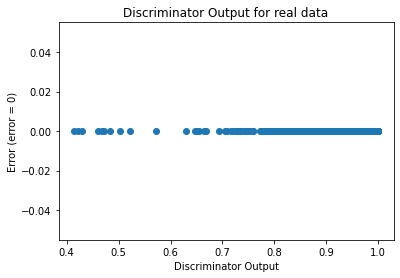

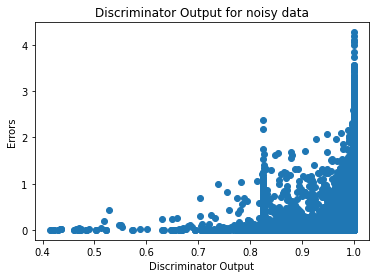

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5581]], device='cuda:0', requires_grad=True)
